# 20160929_Задача по защите струи_Огольцов

In [74]:
import numpy as np
import itertools
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Грузим два изображения

In [75]:
# без защитной трубы
img0 = cv2.imread('../data/0.png', 0)

# с защитной трубой
img1 = cv2.imread('../data/1.png', 0)

In [76]:
def get_img_histo(img):
    n = 20
    #img2 = cv2.resize(img, dsize=(n, n), interpolation=cv2.INTER_CUBIC)
    #pixels = list(img2[i, j] for i in range(n) for j in range(n) if img2[i, j]>0)
    #hist, bins = np.histogram(pixels, bins=10)
    hist, bins = np.histogram(img.ravel(), 256, [0,256])
    return hist, bins

## Без защитной трубы

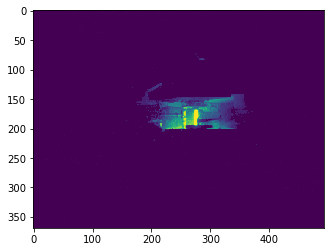

In [77]:
plt.imshow(img0)
plt.show()

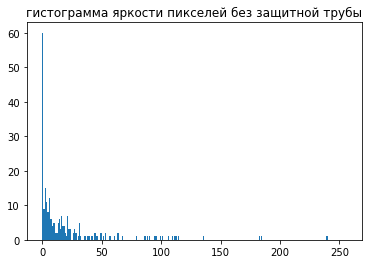

In [78]:
a1, bins1 = get_img_histo(img0)
plt.hist(a1, bins=bins1) 
plt.title(u"гистограмма яркости пикселей без защитной трубы") 
plt.show()

## С защитной трубой

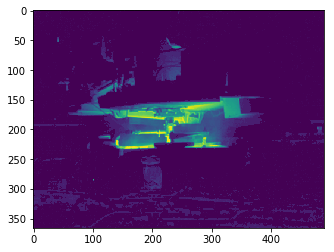

In [79]:
plt.imshow(img1)
plt.show()

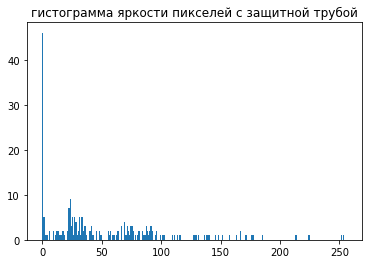

In [80]:
a1, bins1 = get_img_histo(img1)
plt.hist(a1, bins=bins1) 
plt.title(u"гистограмма яркости пикселей с защитной трубой") 
plt.show()

## Попробуем учесть наличие очень яркого объекта (струи) и ограничений дин. диапазона камеры

In [81]:
def get_nonzero_share1(img):
    # Баланс яркости будет оцениваться по всему изображению
    n1 = sum(1 for a in img.ravel() if a > 0)
    nn = img.shape[0]*img.shape[1]
    return n1/float(nn)


def get_nonzero_share2(img):
    # оставляем полосу высотой 1/3, в ней и будет оценивать баланс яркости
    h = img.shape[1]
    img_cband = img[:, h/3:int(h*2.0/3)]
    
    n1 = sum(1 for a in img_cband.ravel() if a > 0)
    nn = img_cband.shape[0]*img_cband.shape[1]
    return n1/float(nn)

In [82]:
print('img0 --> nonzero_share={}'.format(get_nonzero_share1(img0)))
print('img1 --> nonzero_share={}'.format(get_nonzero_share1(img1)))

img0 --> nonzero_share=0.0652605309015
img1 --> nonzero_share=0.218361326226


### Видно, что для изображения струи с защитной трубой кол-во пикселей с яркостью выше порога заметно больше.